
NST: Neural Style Transfer
                    






Ever thought Neural Network can mimic your own style of painting?

Neural style transfer aka NST's are remarkably great at creating digital art piece just like you!! Checkout the quick Implementation.

Note: Do refer the original paper for NST architecture and further understanding :p

In this notebook, I have applied my own painting style to Sophie's Image(A cat). You could try it with any image of your choice. 

For reference, I have used two images, 

Content image: Sophie's Image(Cats image as a content image) and 
Style image: Ballet Dancer(Art piece created by me as a style image) 



In [2]:
#%tensorflow_version 2.x
 
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
print(tf.__version__)
 
import IPython.display as display
 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,20)
mpl.rcParams['axes.grid'] = False
 
import numpy as np
import PIL.Image
import time
import functools


2.7.0


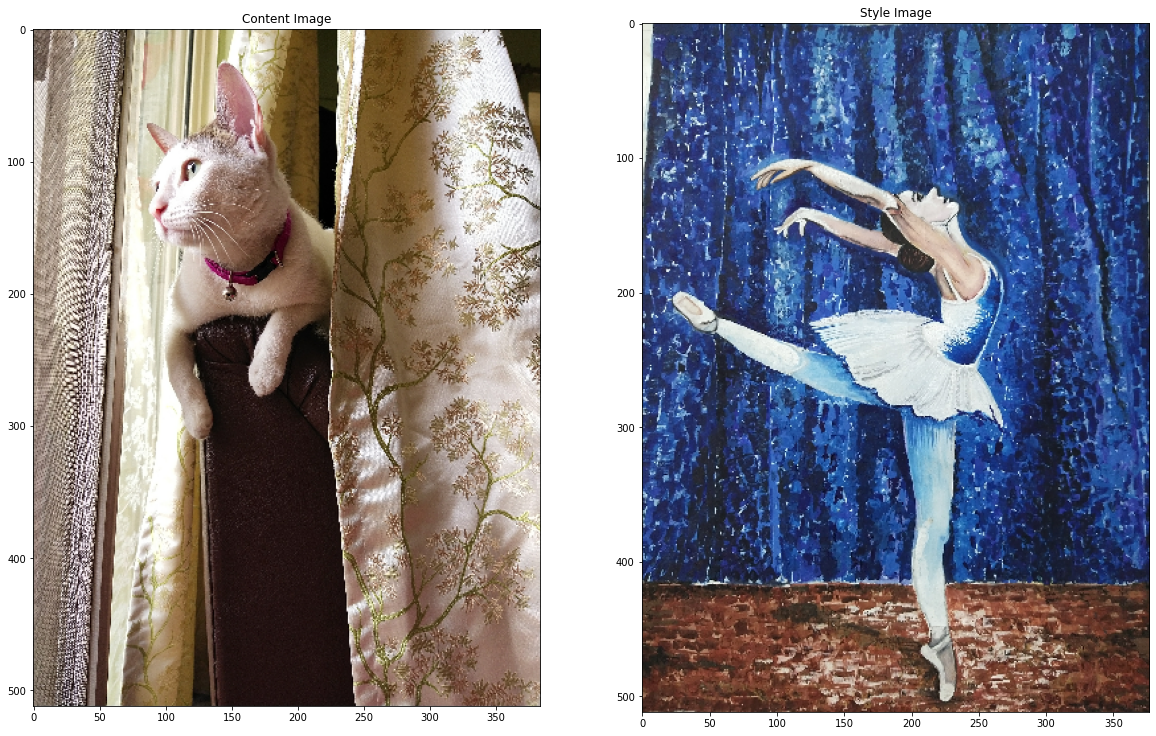

In [10]:
 
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)
 
 
# Visualize the input
# Define a function to load an image and limit its maximum dimension to 512 pixels.
 
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
 
  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim
 
  new_shape = tf.cast(shape * scale, tf.int32)
 
  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img
 
 
 
# Create a simple function to display an image:
 
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)
 
  plt.imshow(image)
  if title:
    plt.title(title)
 
 
#choose a style image and a content image:
 #/content/Sophie_content_image10.png
 #content_path = '/content/Sophie_content_image3.png'
content_path ='/home/acer/PycharmProjects/pythonProject/python/cnn/Sophie_content_image3.png'


 #style_path = '/content/style_image_BalletDancer.jpg'
style_path = '/home/acer/PycharmProjects/pythonProject/python/cnn/style_image_BalletDancer.jpg'

content_image = load_img(content_path)
style_image = load_img(style_path)
 
plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')
 
plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')
   

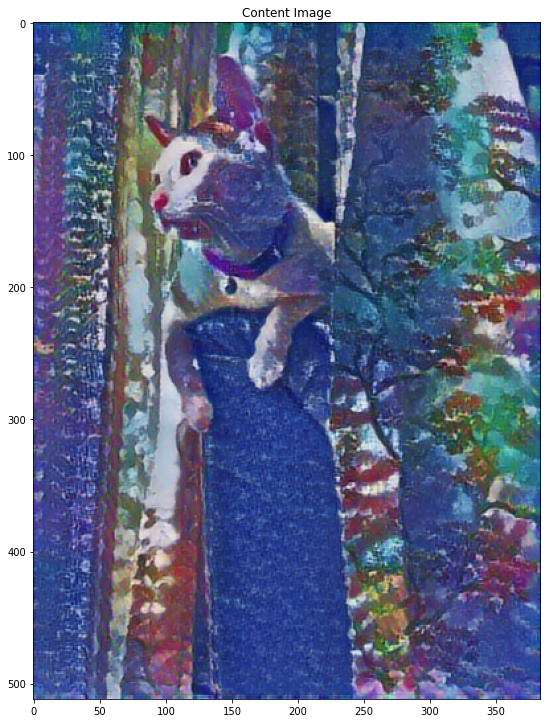

In [18]:
# Use the TensorFlow Hub

import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)
 

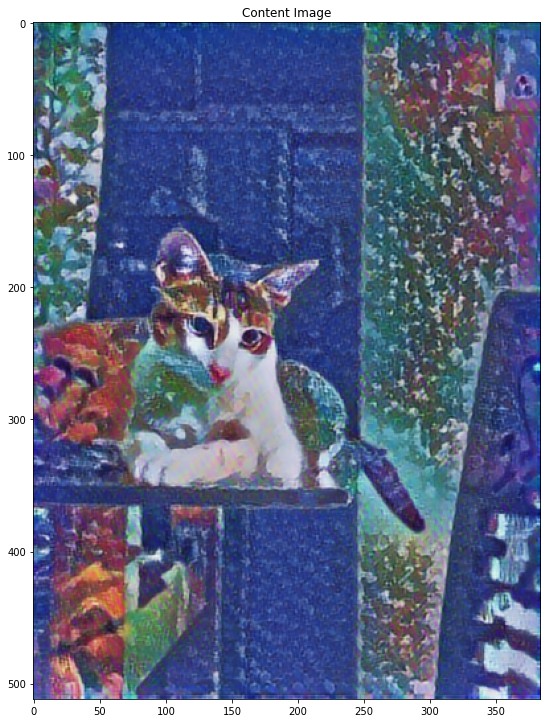

In [20]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')

stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)
